<img src="https://ucfai.org/core Group/Spring 2020//banner.png">

<div class="col-12">
    <h1> A Walk Through the Random Forest </h1>
    <hr>
</div>

<div style="line-height: 2em;">
    <p>by: 
        <a href="https://ucfai.org/authors/">@</a>
    
        <a href="https://ucfai.org/authors/">@</a>
     on 2020-01-29 17:30:00</p>
</div>

In [ ]:
from pathlib import Path

DATA_DIR = Path("/kaggle/input")
if (DATA_DIR / "ucfai-core-sp20-rf-svm").exists():
    DATA_DIR /= "ucfai-core-sp20-rf-svm"
else:
    # You'll need to download the data from Kaggle and place it in the `data/`
    #   directory beside this notebook.
    # The data should be here: https://kaggle.com/c/ucfai-core-sp20-rf-svm/data
    DATA_DIR = Path("data")

## Overview

Before getting going on more complex examples, we're going to take a look at a very simple example using the Iris Dataset. 

The final example deals with credit card fraud, and how to identify if fraud is taking place based a dataset of over 280,000 entries. 

In [ ]:
# Importing the important stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier

# change this if running locally
DATA_DIR = "/kaggle/input/ucfai-core-sp20-rf-svm"
# DATA_DIR = "."

____
## Iris Data Set

This is a classic dataset of flowers. The goal is to have the model classify the types of flowers based on 4 factors. Those factors are sepal length, sepal width, petal length, and petal width, which are all measured in cm. The dataset is very old in comparison to many of the datasets we use, coming from a [1936 paper about taxonomy](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1469-1809.1936.tb02137.x).


### Getting the Data Set


Sklearn has the dataset built into the the library, so getting the data will be easy. Once we do that, we'll do a test-train split.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.1)

### Making the Model

Making and Random Forests model is very easy, taking just two lines of code! Training times can take a second, but in this example is small so the training time is minimal.

In [ ]:
trees = RandomForestClassifier(n_estimators=150)
trees.fit(X_train, Y_train)

### We need to Figure out how well this model does

There are a few ways we are going to test for accuracy using a Confusion Matrix and Matthews Correlation Coefficient . 




#### Confusion Matrix

A Confusion Matrix shows us where the model is messing up. Below is an example from dataschool.io. The benefit of a confusion matrix is that it is a very easy way to visualise the performance of the model. 

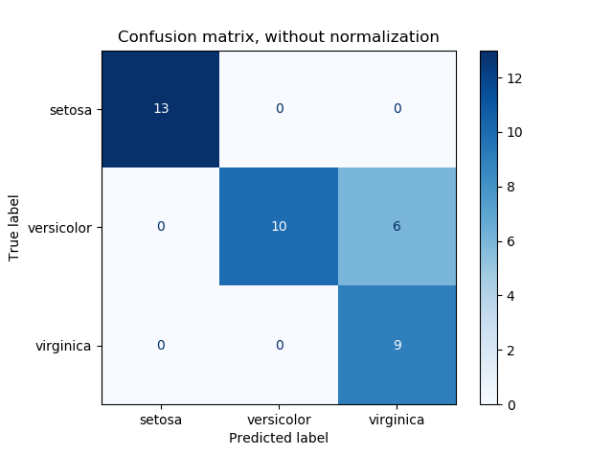

In [ ]:
predictions = trees.predict(X_test)
confusion = confusion_matrix(Y_test, predictions)

def plot_confusion_matrix(confusion):
  categories = ["setosa", "versicolor", "virginica"]
  fig, ax = plt.subplots()
  im = ax.imshow(confusion)
  ax.set_yticks(np.arange(len(categories)))
  ax.set_yticklabels(categories)

  for i in range(len(categories)):
    for j in range(len(confusion)):
      ax.text(i, j, confusion[i, j], ha="center", va="center", color="white")

plot_confusion_matrix(confusion)

#### Matthews correlation coefficient

This is used to find the quality of binary classification. It is based on the values found in the Confusion Matrix and tries to take those values and boil it down to one number. It is generally considered one of the better measures of quality for classification. MCC does not rely on class size, so in cases where we have very different class sizes, we can get a realiable measure of how well it did. 

___ 

Matthews correlation coefficient ranges from -1 to 1. -1 represents total disagreement between the prediction and the observation, while 1 represents prefect prediction. In other words, the closer to 1 we get the better the model is considered. 

In [ ]:
print(matthews_corrcoef(Y_test, predictions))

# Nearest Neighbors
The K Nearest Neighbors (KNN) model classifies data based on the averages of the values of the nearest neighbors. KNNs make predictions by calculating similarities between input and the testing values closest to it.

K is a parameter that determines the number of neighbors we compare our testing value against. In the example below, the red star depicts the value we are testing. When k = 3, we look at the 3 nearest neighbors, and since 2 blue is greater than one yellow, we assume that the test value belongs to the blue class. When k = 6, we look at a broader region of of neighbors, and since 4 yellow is greater than 2 blue, we classify our value as yellow.

![alt text](https://miro.medium.com/proxy/1*2zYNhLc522h0zftD1zDh2g.png)

For a more in depth look at this alogrithm, check out these articles:

https://pythonspot.com/k-nearest-neighbors/

https://medium.com/@avulurivenkatasaireddy/k-nearest-neighbors-and-implementation-on-iris-data-set-f5817dd33711

In [ ]:
# display our training data on a scatter plot

plt.figure(figsize=(12,12))
plt.subplot(441)
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)
plt.subplot(442)
plt.scatter(X_train[:,1], X_train[:,2], c=Y_train)
plt.subplot(443)
plt.scatter(X_train[:,2], X_train[:,3], c=Y_train)
plt.subplot(444)
plt.scatter(X_train[:,3], X_train[:,0], c=Y_train)

In [ ]:
# initialize and train our model
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, Y_train)

In [ ]:
predictions = neigh.predict(X_test)
print("Test Values: ", Y_test)
print("Predictions: ", predictions)


correct = 0
for i in range(0, len(predictions)):
  if predictions[i] == Y_test[i]:
    correct+=1

print("Accuracy: %.2f %%" % (correct * 100 /len(predictions)))

In [ ]:
# Ploting predictions
plt.figure(figsize=(12,12))
plt.subplot(441)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions)
plt.subplot(442)
plt.scatter(X_test[:,1], X_test[:,2], c=predictions)
plt.subplot(443)
plt.scatter(X_test[:,2], X_test[:,3], c=predictions)
plt.subplot(444)
plt.scatter(X_test[:,3], X_test[:,0], c=predictions)

### Now, what about SVMs?

We want to see how well SVMs can work on the Iris, so let's see it in action.

First, let's define the models; one for linear, rbf and ploy.

In [ ]:
# SVM regularization parameter, we'll keep it simple for now
C = 1.0 

models = [svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C)]

Once we have the models defined, let's train them!

In [ ]:
models = (clf.fit(X_train, Y_train) for clf in models)

Now we are going to graph the models to *see* what is going on. 

Yes, it is messy messy code, but it will look pretty once it's all done.

In [ ]:
results = []

for clf in models:
  predictions = clf.predict(X_test)
  results.append(matthews_corrcoef(Y_test, predictions))
  plot_confusion_matrix(confusion_matrix(Y_test, predictions))
  


The confusion matrix is all nice and dandy, but let's check out what the Matthews Coefficient has to say about our models.

In [ ]:
print(results)

That wasn't too bad was it? Both Random Forests and SVMs are very easy models to implement and its low training times means that the model can be used without the overheads associated with neural networks, which we will learn more about next week.


## Credit Card Fraud Dataset

As always, we are going to need a dataset to work on!
Credit card fraud detection is a serious issue, and as such is something that data scientists have looked into. This dataset is from a Kaggle competition with over 2,000 Kernals based on it. Let's see how well Random Forests can do with this dataset!

Lets read in the data and use *.info()* to find out some meta-data

In [ ]:
data = pd.read_csv(f"{DATA_DIR}/train.csv")
data.head()

What's going on with this V stuff?
Credit Card information is a bit sensitive, and as such raw information had to be obscured in some way to protect that information.

In this case, the data provider used a method know as PCA transformation to hide those features that would be considered sensitive. PCA is a very usefull technique for dimension reduction, a topic that we will be covering in a later lecture. For now, know that this technique allows us to take data and transform it in a way that maintains the patterns in that data.

If you are interested in learning more about PCA, [Consider checking out this article](https://towardsdatascience.com/a-step-by-step-explanation-of-principal-component-analysis-b836fb9c97e2). Unfortunately, there is a lot that we want to cover in Core and not enough time to do all of it. :(

Next, let's get some basic statistical info from this data.

In [ ]:
data.describe()

### Some important points about this data 

For most of the features, there is not a lot we can gather since it's been obscured with PCA. However there are three features that have been left in for us to see. 

#### 1. Time

Time is the amount of time from first transaction in seconds. The max is 172792, so the data was collected for around 48 hours. 

#### 2. Amount

Amount is the amount that the transaction was for. The denomination of the transactions was not given, so we're going to be calling them "Simoleons" as a place holder. Some interesting points about this feature is the STD, or standard deviation, which is 250§. That's quite large, but makes sense when the min and max are 0§ and 25,691§ respectively. There is a lot of variance in this feature, which is to be expected. The 75% amount is only in 77§, which means that the whole set skews to the lower end.

#### 3. Class

This tells us if the transaction was fraud or not. 0 is for no fraud, 1 if it is fraud. If you look at the mean, it is .001727, which means that only .1727% of the 284,807 cases are fraud. There are only 492 fraud examples in this data set, so we're looking for a needle in a haystack in this case.

Now that we have that out of the way, let's start making this model! We first need to split up our data into Test and Train sets.

In [ ]:
X = data.drop(labels='Class', axis = 1)
Y = data.loc[:,'Class']

#don't need that original data
del data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1)

#don't need our X and Y anymore
del X, Y

### Some Points about Training

With Random Forest and SVMs, training time is very quick, so we can finish training the model in realitively short order, even when our dataset contains 284,807 entries. This is done without the need of GPU acceleration, which Random Forests cannot take advantage of.

The area is left blank, but there's examples on how to make the models earlier in the notebook that can be used as an example if you need it. What model and the parameters you choose are up to you, so have fun!

In [ ]:
start = time.time()
# TODO, make the model
# call the model variable: model
### BEGIN SOLUTION
model = RandomForestClassifier(n_estimators=150)
model = model.fit(X_train, Y_train)
### END SOLUTION
end = time.time()

# this is going to tell you the time it took to train
print(end-start)

### Testing the model 

Whenever the model is done training, use the testing set to find the Matthews Correlation Coefficient. We have examples of it from eariler in the notebook, so give them a look if you need an example. 

We're going to be collecting the data of everyone's results and graphing out the relationship between Number of Trees, Training Time, and Quality using MCC as the metric. 

In [ ]:
# TODO, use your model to predict for the test set
# needs to be:
### BEGIN SOLUTION
predictions = model.predict(X_test)
print(matthews_corrcoef(Y_test, predictions))
### END SOLUTION

## Create submission file for Kaggle Competition
This uses some data you don't have the labels for, see the competition leaderboard for your results!

In [ ]:
submission_data = pd.read_csv(f"{DATA_DIR}/test.csv")
predictions = model.predict(submission_data)

predictions = pd.DataFrame({'Id': submission_data[submission_data.columns[0]], 'Class': predictions})

predictions.to_csv('submission.csv', header=['Id', 'Class'], index=False)

## Thank You

We hope that you enjoyed being here today.

Please fill out [this questionaire](
https://ucfai.org/feedback
) so we can get some feedback about tonight's meeting.

We hope to see you here again next week for our Core meeting on *Neural Networks*.

### Live in Virtue